## Modelo de ML - Student Productivity Prediction

En este notebook entrenaremos un modelo de regresión para predecir el `productivity_score` de estudiantes, basándonos en variables como horas de estudio, sueño, uso de dispositivos, entre otras.

**Dataset:** [Student Productivity & Digital Distraction Dataset](https://www.kaggle.com/datasets/sehaj1104/student-productivity-and-digital-distraction-dataset) - 20,000 registros de estudiantes con información sobre sus hábitos y rendimiento académico.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

## 1. Carga de datos y EDA

Exploramos la estructura del dataset, estadísticas descriptivas, valores nulos y distribuciones de las variables.

In [2]:
data = pd.read_csv("student_productivity_distraction_dataset_20000.csv")
data.head()

,student_id,age,gender,study_hours_per_day,sleep_hours,phone_usage_hours,social_media_hours,youtube_hours,gaming_hours,breaks_per_day,coffee_intake_mg,exercise_minutes,assignments_completed,attendance_percentage,stress_level,focus_score,final_grade,productivity_score
0,1,23,Female,4.35,3.63,3.38,2.73,1.83,5.26,6,347,111,2,57.21,10,57,81.87,33.78
1,2,20,Male,6.14,6.58,5.48,1.51,3.13,1.73,13,403,28,10,91.27,10,49,60.90,48.99
2,3,29,Female,4.98,3.26,4.83,3.63,0.18,4.71,1,419,102,8,63.14,2,38,86.22,36.60
3,4,27,Female,3.19,4.58,10.06,3.95,5.75,2.52,9,178,28,18,40.51,6,50,71.77,19.87
4,5,24,Male,7.67,6.21,3.02,1.59,5.46,5.65,8,436,105,7,45.53,6,41,90.13,52.90


In [3]:
data.info()

<class 'pandas.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   student_id             20000 non-null  int64  
 1   age                    20000 non-null  int64  
 2   gender                 20000 non-null  str    
 3   study_hours_per_day    20000 non-null  float64
 4   sleep_hours            20000 non-null  float64
 5   phone_usage_hours      20000 non-null  float64
 6   social_media_hours     20000 non-null  float64
 7   youtube_hours          20000 non-null  float64
 8   gaming_hours           20000 non-null  float64
 9   breaks_per_day         20000 non-null  int64  
 10  coffee_intake_mg       20000 non-null  int64  
 11  exercise_minutes       20000 non-null  int64  
 12  assignments_completed  20000 non-null  int64  
 13  attendance_percentage  20000 non-null  float64
 14  stress_level           20000 non-null  int64  
 15  focus_score  

In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
student_id,20000.0,10000.500000,5773.647028,1.0,5000.7500,10000.500,15000.2500,20000.00
age,20000.0,23.007450,3.754890,17.0,20.0000,23.000,26.0000,29.00
study_hours_per_day,20000.0,5.254562,2.742876,0.5,2.9000,5.250,7.6400,10.00
sleep_hours,20000.0,6.517799,2.029784,3.0,4.7700,6.510,8.3100,10.00
phone_usage_hours,20000.0,6.250479,3.313082,0.5,3.3800,6.240,9.1025,12.00
social_media_hours,20000.0,4.003655,2.305154,0.0,2.0000,4.010,5.9700,8.00
youtube_hours,20000.0,2.990177,1.729815,0.0,1.4875,2.980,4.4800,6.00
gaming_hours,20000.0,2.988339,1.732803,0.0,1.4900,2.970,4.4900,6.00
breaks_per_day,20000.0,7.542400,4.016231,1.0,4.0000,8.000,11.0000,14.00
coffee_intake_mg,20000.0,249.654550,143.711231,0.0,125.0000,249.000,373.0000,499.00


In [5]:
# Verificar valores nulos
data.isnull().sum()

student_id               0
age                      0
gender                   0
study_hours_per_day      0
sleep_hours              0
phone_usage_hours        0
social_media_hours       0
youtube_hours            0
gaming_hours             0
breaks_per_day           0
coffee_intake_mg         0
exercise_minutes         0
assignments_completed    0
attendance_percentage    0
stress_level             0
focus_score              0
final_grade              0
productivity_score       0
dtype: int64

No hay valores nulos en el dataset. Ahora checamos la distribución de la variable objetivo y de las features.

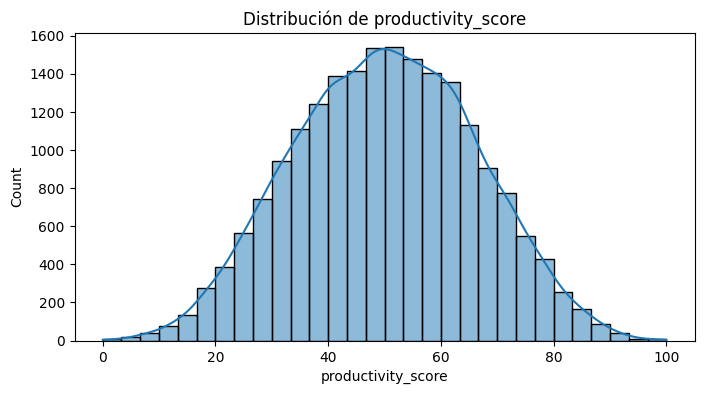

In [6]:
# Distribución de la variable objetivo
fig, ax = plt.subplots(figsize=(8, 4))
sns.histplot(data["productivity_score"], bins=30, kde=True, ax=ax)
ax.set_title("Distribución de productivity_score")
plt.show()

Distribución normal de la variable objetivo

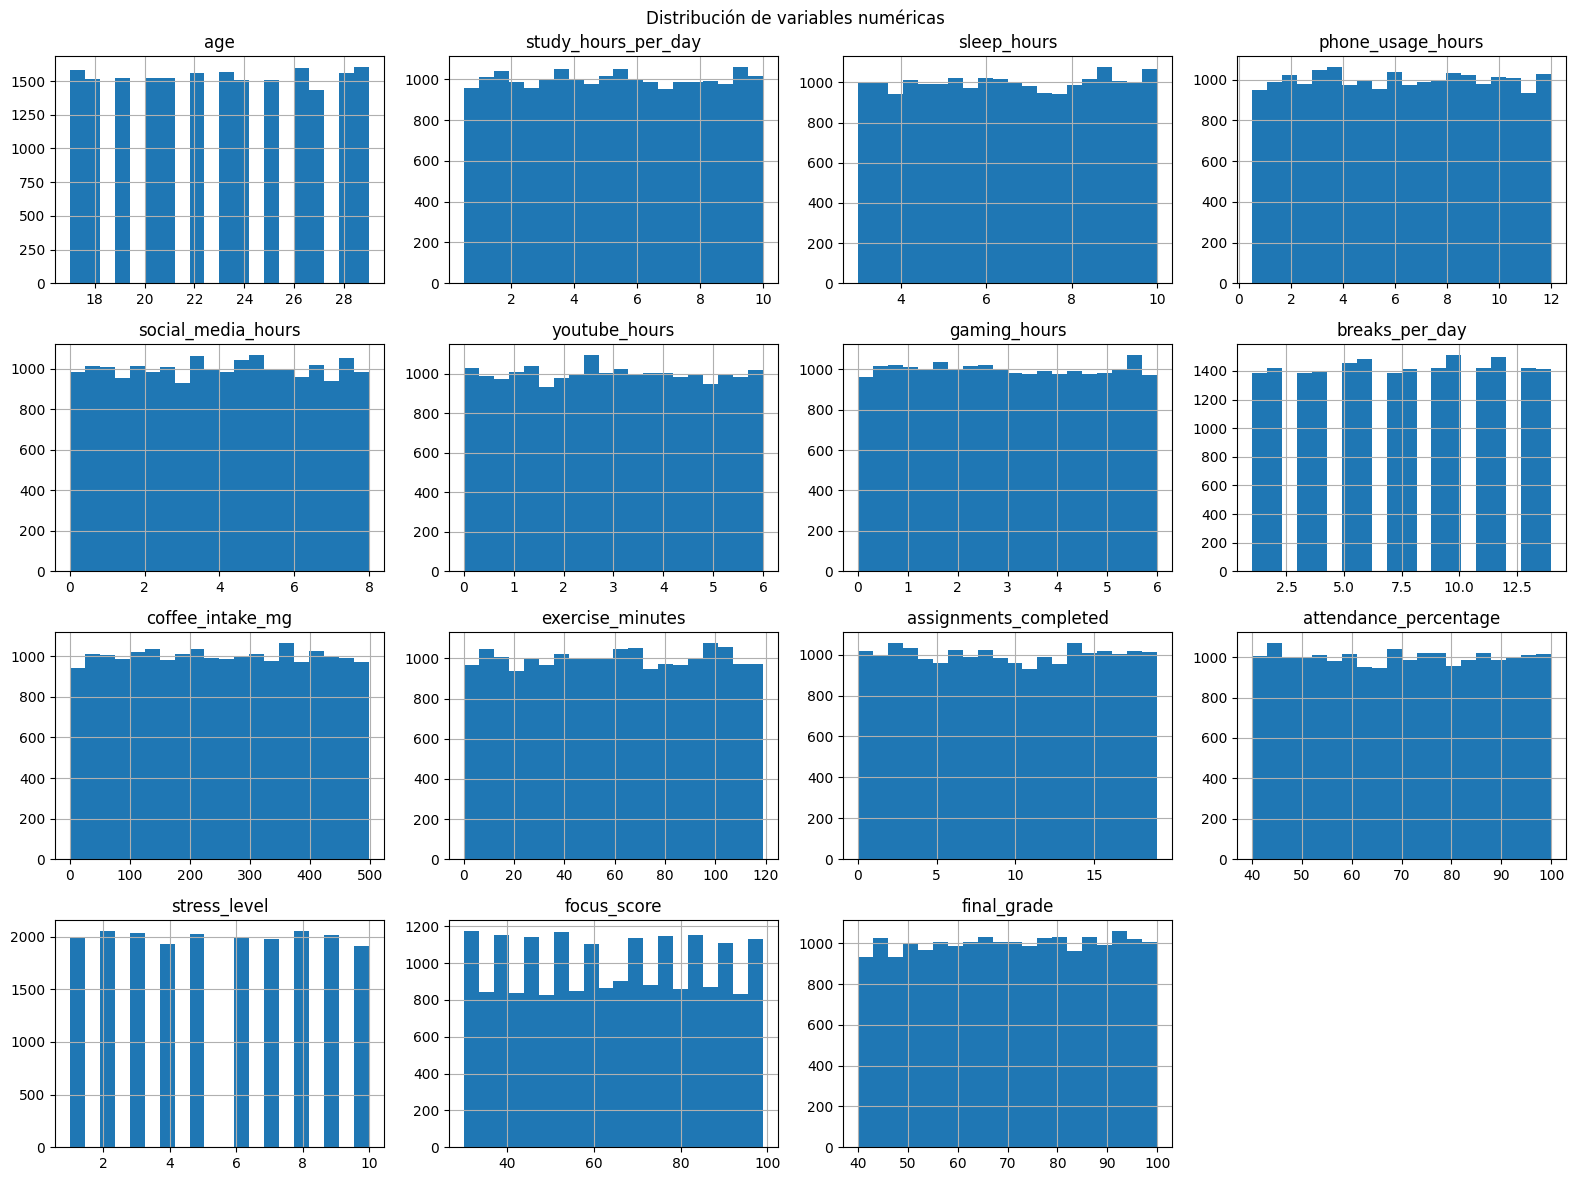

In [7]:
# Distribución de variables numéricas
numerical_cols = ["age", "study_hours_per_day", "sleep_hours", "phone_usage_hours",
                  "social_media_hours", "youtube_hours", "gaming_hours", "breaks_per_day",
                  "coffee_intake_mg", "exercise_minutes", "assignments_completed",
                  "attendance_percentage", "stress_level", "focus_score", "final_grade"]

data[numerical_cols].hist(bins=20, figsize=(16, 12))
plt.suptitle("Distribución de variables numéricas")
plt.tight_layout()
plt.show()

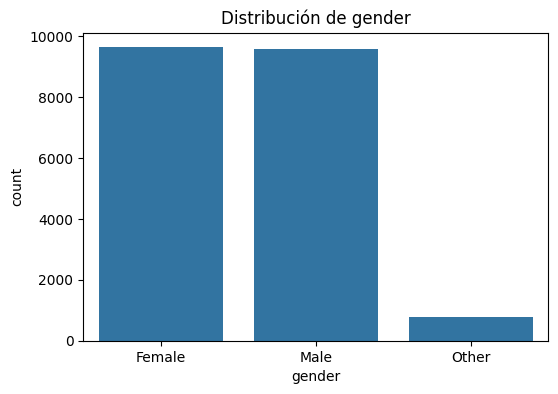

In [8]:
# Distribución de la variable categórica gender
fig, ax = plt.subplots(figsize=(6, 4))
sns.countplot(data=data, x="gender", ax=ax)
ax.set_title("Distribución de gender")
plt.show()

Analizamos la correlación entre las variables numéricas y el target para identificar qué features son más relevantes.

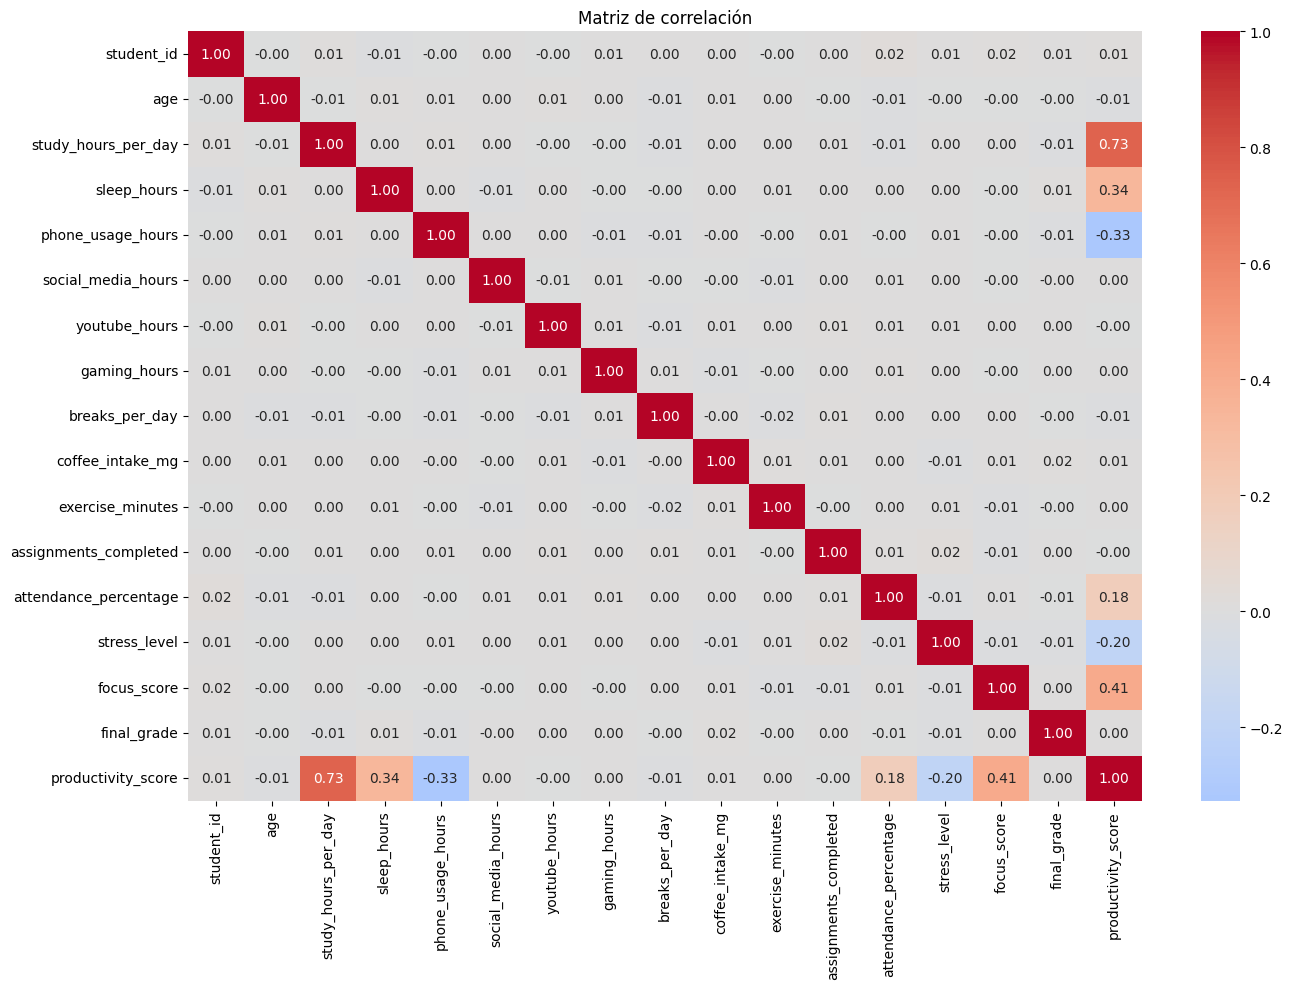

In [9]:
# Mapa de correlación
fig, ax = plt.subplots(figsize=(14, 10))
corr = data.select_dtypes(include=[np.number]).corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", center=0, ax=ax)
ax.set_title("Matriz de correlación")
plt.tight_layout()
plt.show()

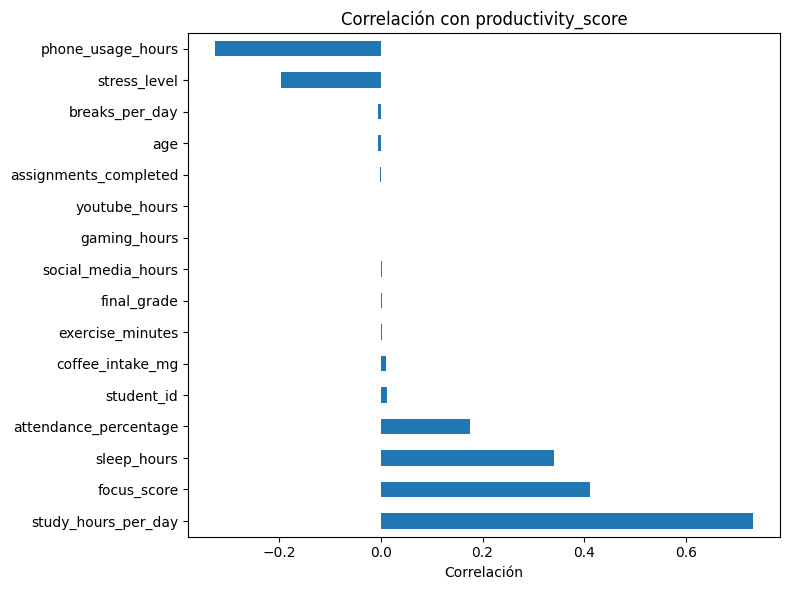

In [10]:
# Correlación de cada variable con productivity_score
corr_with_target = corr["productivity_score"].drop("productivity_score").sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(8, 6))
corr_with_target.plot(kind="barh", ax=ax)
ax.set_title("Correlación con productivity_score")
ax.set_xlabel("Correlación")
plt.tight_layout()
plt.show()

Entre mayor la correlación, afecta más positivamente, como las horas al día estudiadas. Por otro lado, entre menor, afecta más negativamente (las horas en el teléfono en este caso).

## 2. Preprocesamiento

Separamos features y target, eliminamos `student_id` (es solo un identificador) y definimos un pipeline con `StandardScaler` para las variables numéricas y `OneHotEncoder` para `gender`.

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Separar features y target, eliminando student_id
X = data.drop(columns=["student_id", "productivity_score"])
y = data["productivity_score"]

# Identificar columnas por tipo
cat_cols = ["gender"]
num_cols = [col for col in X.columns if col not in cat_cols]

print(f"Variables numéricas ({len(num_cols)}): {num_cols}")
print(f"Variables categóricas ({len(cat_cols)}): {cat_cols}")

Variables numéricas (15): ['age', 'study_hours_per_day', 'sleep_hours', 'phone_usage_hours', 'social_media_hours', 'youtube_hours', 'gaming_hours', 'breaks_per_day', 'coffee_intake_mg', 'exercise_minutes', 'assignments_completed', 'attendance_percentage', 'stress_level', 'focus_score', 'final_grade']
Variables categóricas (1): ['gender']


In [12]:
# Definir pipeline de preprocesamiento
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols)
    ]
)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Train: {X_train.shape[0]} muestras")
print(f"Test: {X_test.shape[0]} muestras")

Train: 16000 muestras
Test: 4000 muestras


## 3. Entrenamiento y evaluación

Utilizamos **Random Forest Regressor** como modelo de regresión. Como métricas evaluamos:
- **R² (coeficiente de determinación):** Indica qué proporción de la varianza del target es explicada por el modelo. Valor ideal: 1.
- **MAE (Mean Absolute Error):** Error promedio absoluto de las predicciones. Mientras más bajo, mejor.

In [13]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error

# Pipeline completo: preprocesamiento + modelo
model_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("regressor", RandomForestRegressor(n_estimators=200, max_depth=15, random_state=42, n_jobs=-1))
])

# Entrenar
model_pipeline.fit(X_train, y_train)

# Predecir
y_pred_train = model_pipeline.predict(X_train)
y_pred_test = model_pipeline.predict(X_test)

# Evaluar
print("=== Resultados en Train ===")
print(f"R²:  {r2_score(y_train, y_pred_train):.4f}")
print(f"MAE: {mean_absolute_error(y_train, y_pred_train):.4f}")
print()
print("=== Resultados en Test ===")
print(f"R²:  {r2_score(y_test, y_pred_test):.4f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_test):.4f}")

=== Resultados en Train ===
R²:  0.9965
MAE: 0.7548

=== Resultados en Test ===
R²:  0.9753
MAE: 1.9813


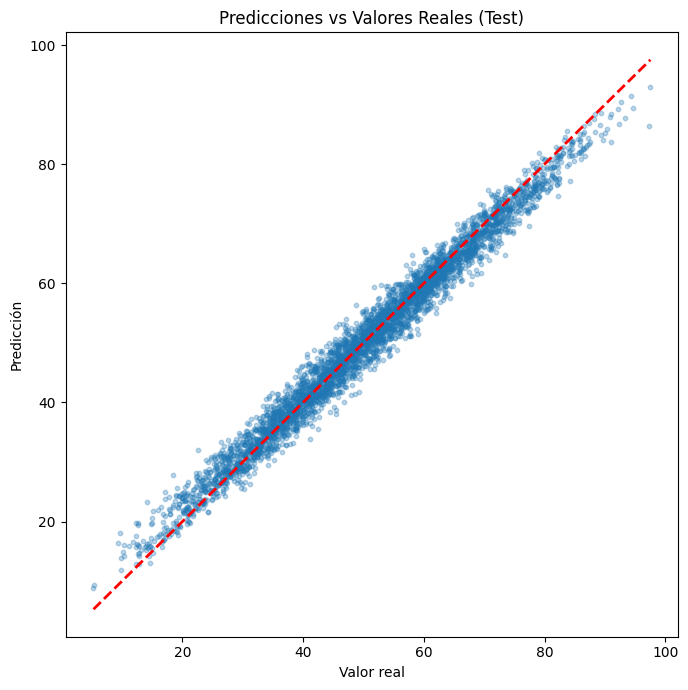

In [14]:
# Visualización: predicciones vs valores reales
fig, ax = plt.subplots(figsize=(7, 7))
ax.scatter(y_test, y_pred_test, alpha=0.3, s=10)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--", lw=2)
ax.set_xlabel("Valor real")
ax.set_ylabel("Predicción")
ax.set_title("Predicciones vs Valores Reales (Test)")
plt.tight_layout()
plt.show()

Vemos predicciones vs valores reales y la distribución de los errores para verificar que el modelo no tenga sesgo.

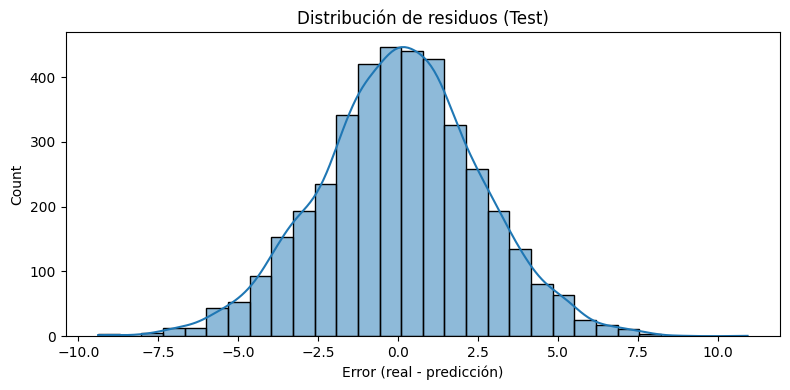

In [15]:
# Distribución de residuos
residuals = y_test - y_pred_test

fig, ax = plt.subplots(figsize=(8, 4))
sns.histplot(residuals, bins=30, kde=True, ax=ax)
ax.set_title("Distribución de residuos (Test)")
ax.set_xlabel("Error (real - predicción)")
plt.tight_layout()
plt.show()

## 4. Exportar modelo

Exportamos el pipeline completo con `joblib` (para la app Python) y también en formato **ONNX** (para la app Node.js). Para ONNX, exportamos los parámetros de preprocesamiento por separado en JSON, ya que Node.js necesita replicar el escalado manualmente.

In [16]:
import joblib

model_path = "model.joblib"
joblib.dump(model_pipeline, model_path)
print(f"Modelo exportado a: {model_path}")

Modelo exportado a: model.joblib


In [18]:
from skl2onnx import convert_sklearn
from skl2onnx.common.data_types import FloatTensorType, StringTensorType

# Definir los tipos de entrada (tal cual recibe el pipeline de sklearn)
initial_types = []
for col in num_cols:
    initial_types.append((col, FloatTensorType([None, 1])))
for col in cat_cols:
    initial_types.append((col, StringTensorType([None, 1])))

# Convertir el pipeline completo (preprocesamiento + modelo) a ONNX
onnx_model = convert_sklearn(model_pipeline, initial_types=initial_types, target_opset=12)

with open("model.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

print(f"Pipeline completo exportado a: model.onnx")

Pipeline completo exportado a: model.onnx
